In [2]:
# Dependencies
import pandas as pd
import csv
import requests
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
from sodapy import Socrata
import os
import gmaps
from config import api_key


In [3]:
# Data collection - year 2021 - during-covid

client = Socrata("data.melbourne.vic.gov.au", app_token="Mp9xM2ztPtLxPmpOj2ZhhkFYm", username="angelaliu0101@gmail.com", password="Lh*19630722")

results_2021 = client.get("b2ak-trbp", year= 2021, limit = 10000000)

results_2021_df = pd.DataFrame.from_records(results_2021)
results_2021_mor_df = pd.DataFrame.from_records(results_2021)
results_2021_md_df = pd.DataFrame.from_records(results_2021)
results_2021_eve_df = pd.DataFrame.from_records(results_2021)

results_2021_df.to_csv("foottrafficsdata2021.csv")
results_2021_mor_df.to_csv("foottrafficsdata2021.csv")
results_2021_md_df.to_csv("foottrafficsdata2021.csv")
results_2021_eve_df.to_csv("foottrafficsdata2021.csv")
results_2021_df.head()

,id,date_time,year,month,mdate,day,time,sensor_id,sensor_name,hourly_counts
0,3482939,2021-01-01T00:00:00.000,2021,January,1,Friday,0,4,Town Hall (West),1461
1,3482940,2021-01-01T00:00:00.000,2021,January,1,Friday,0,17,Collins Place (South),79
2,3482941,2021-01-01T00:00:00.000,2021,January,1,Friday,0,18,Collins Place (North),33
3,3482942,2021-01-01T00:00:00.000,2021,January,1,Friday,0,53,Collins St (North),196
4,3482943,2021-01-01T00:00:00.000,2021,January,1,Friday,0,2,Bourke Street Mall (South),236


In [4]:
# Data 2021 cleaning - data types

results_2021_df.dtypes

id               object
date_time        object
year             object
month            object
mdate            object
day              object
time             object
sensor_id        object
sensor_name      object
hourly_counts    object
dtype: object

In [8]:
# Data 2021 cleaning - data types
data_type_dict = {"id":int,"year":int,"mdate":int,"time":int,"hourly_counts":float}
results_2021_df = results_2021_df.astype(data_type_dict)
results_2021_mor_df = results_2021_df.astype(data_type_dict)
results_2021_md_df = results_2021_df.astype(data_type_dict)
results_2021_eve_df = results_2021_df.astype(data_type_dict)
results_2021_df.dtypes
results_2021_df.to_csv('DATA.csv',index=False)

In [9]:
# morning Data 2021 groupby sum
results_2021_mor_df= results_2021_df[(results_2021_mor_df["time"] >= 7) & (results_2021_mor_df["time"] <= 10)]
location = results_2021_mor_df.groupby("sensor_name")
foottrafic_2021 = location["hourly_counts"].sum()

results_2021_mor_groupby_df = pd.DataFrame({"Midday foottrafic 2021": foottrafic_2021})
results_2021_mor_groupby_df = results_2021_mor_groupby_df.reset_index()
results_2021_mor_groupby_df.rename(columns={"sensor_name":"location"},inplace=True)
results_2021_mor_groupby_df

,location,Midday foottrafic 2021
0,231 Bourke St,314431.0
1,Alfred Place,103961.0
2,Birrarung Marr,257212.0
3,Bourke St - Spencer St (North),510439.0
4,Bourke St - Spencer St (South),25326.0
...,...,...
77,Town Hall (West),704760.0
78,Victoria Point,73071.0
79,Waterfront City,58041.0
80,Webb Bridge,251578.0


In [10]:
# morning Data 2021 groupby mean & std

results_2021_mor_df= results_2021_mor_df[(results_2021_mor_df["time"] >= 7) & (results_2021_mor_df["time"] <= 10)]
location = results_2021_mor_df.groupby("sensor_name")
foottrafic_2021_mor = location["hourly_counts"].describe()

foottrafic_2021_mor


,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,236.770331,119.449393,0.0,147.00,232.5,309.00,740.0
Alfred Place,1452.0,71.598485,59.865361,1.0,26.00,48.0,107.00,323.0
Birrarung Marr,1460.0,176.172603,160.816957,10.0,106.00,151.0,212.00,3801.0
Bourke St - Spencer St (North),1460.0,349.615753,292.462820,2.0,116.75,270.0,508.00,1628.0
Bourke St - Spencer St (South),248.0,102.120968,81.451319,4.0,37.75,81.5,146.25,427.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,482.712329,332.507044,34.0,229.00,354.5,703.75,1649.0
Victoria Point,1440.0,50.743750,46.344770,0.0,12.00,40.0,73.00,269.0
Waterfront City,1460.0,39.754110,21.111258,0.0,25.75,37.0,51.00,143.0


In [11]:
# midday Data 2021 groupby sum
results_2021_md_df= results_2021_df[(results_2021_md_df["time"] >= 12) & (results_2021_md_df["time"] <= 15)]
location = results_2021_md_df.groupby("sensor_name")
foottrafic_2021 = location["hourly_counts"].sum()

results_2021_md_groupby_df = pd.DataFrame({"Midday foottrafic 2021": foottrafic_2021})
results_2021_md_groupby_df = results_2021_md_groupby_df.reset_index()
results_2021_md_groupby_df.rename(columns={"sensor_name":"location"},inplace=True)
results_2021_md_groupby_df

,location,Midday foottrafic 2021
0,231 Bourke St,729886.0
1,Alfred Place,185084.0
2,Birrarung Marr,320080.0
3,Bourke St - Spencer St (North),641481.0
4,Bourke St - Spencer St (South),33935.0
...,...,...
77,Town Hall (West),2264144.0
78,Victoria Point,80716.0
79,Waterfront City,91380.0
80,Webb Bridge,355120.0


In [12]:
# midday Data 2021 groupby mean & std

results_2021_md_df= results_2021_md_df[(results_2021_md_df["time"] >= 12) & (results_2021_md_df["time"] <= 15)]
location = results_2021_md_df.groupby("sensor_name")
foottrafic_2021_md = location["hourly_counts"].describe()

foottrafic_2021_md


,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,549.612952,278.569425,105.0,352.75,508.0,685.25,3874.0
Alfred Place,1452.0,127.468320,112.177058,2.0,47.00,83.5,169.25,562.0
Birrarung Marr,1460.0,219.232877,256.215536,10.0,113.00,154.0,238.00,4067.0
Bourke St - Spencer St (North),1460.0,439.370548,251.192160,10.0,176.75,454.5,617.00,1478.0
Bourke St - Spencer St (South),248.0,136.834677,70.963246,22.0,80.00,127.0,192.25,321.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,1550.783562,792.553706,56.0,648.50,1660.5,2109.00,3694.0
Victoria Point,1440.0,56.052778,45.043720,0.0,22.00,46.0,79.00,271.0
Waterfront City,1460.0,62.589041,41.174526,1.0,36.00,53.0,79.00,401.0


In [13]:
# evening Data 2021 groupby sum
results_2021_eve_df= results_2021_df[(results_2021_eve_df["time"] >= 18) & (results_2021_eve_df["time"] <= 21)]
location = results_2021_eve_df.groupby("sensor_name")
foottrafic_2021 = location["hourly_counts"].sum()

results_2021_eve_groupby_df = pd.DataFrame({"Midday foottrafic 2021": foottrafic_2021})
results_2021_eve_groupby_df = results_2021_eve_groupby_df.reset_index()
results_2021_eve_groupby_df.rename(columns={"sensor_name":"location"},inplace=True)
results_2021_eve_groupby_df

,location,Midday foottrafic 2021
0,231 Bourke St,387401.0
1,Alfred Place,53993.0
2,Birrarung Marr,302147.0
3,Bourke St - Spencer St (North),397611.0
4,Bourke St - Spencer St (South),22626.0
...,...,...
77,Town Hall (West),1269141.0
78,Victoria Point,66826.0
79,Waterfront City,114690.0
80,Webb Bridge,200071.0


In [14]:
# evening Data 2021 groupby mean & std

results_2021_eve_df= results_2021_eve_df[(results_2021_eve_df["time"] >= 18) & (results_2021_eve_df["time"] <= 21)]
location = results_2021_eve_df.groupby("sensor_name")
foottrafic_2021_eve = location["hourly_counts"].describe()

foottrafic_2021_eve

,count,mean,std,min,25%,50%,75%,max
sensor_name,,,,,,,,
231 Bourke St,1328.0,291.717620,208.221614,1.0,130.75,250.0,415.00,1243.0
Alfred Place,1452.0,37.185262,31.251025,0.0,13.00,28.0,54.00,197.0
Birrarung Marr,1460.0,206.950000,377.537183,0.0,50.00,103.0,208.00,5496.0
Bourke St - Spencer St (North),1460.0,272.336301,214.993447,0.0,111.00,236.0,357.00,1492.0
Bourke St - Spencer St (South),248.0,91.233871,61.382402,0.0,54.00,78.0,108.25,425.0
...,...,...,...,...,...,...,...,...
Town Hall (West),1460.0,869.274658,639.199899,21.0,328.00,753.0,1295.25,3757.0
Victoria Point,1440.0,46.406944,43.021235,0.0,15.00,38.0,62.00,342.0
Waterfront City,1460.0,78.554795,50.870736,0.0,41.00,72.0,109.00,511.0


In [15]:
# weekly average pedistrain at 231 Bourke St, most visited site
data_wk = pd.read_csv("foottrafficsdata2021.csv")
data_wk = data_wk[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]
#selected area
point='231 Bourke St'
data_wk=data_wk[data_wk['sensor_name']==point]
weeks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [16]:
mors=[]
noons=[]
eves=[]
means=[]
for month in weeks:
    month_data=data_wk.groupby('day').get_group(month)
    mors.append(month_data[month_data['time'].between(7, 10)].hourly_counts.sum()/30)
    noons.append(month_data[month_data['time'].between(12, 15)].hourly_counts.sum()/30)
    eves.append(month_data[month_data['time'].between(18, 21)].hourly_counts.sum()/30)
    means.append(month_data.hourly_counts.sum()/30)

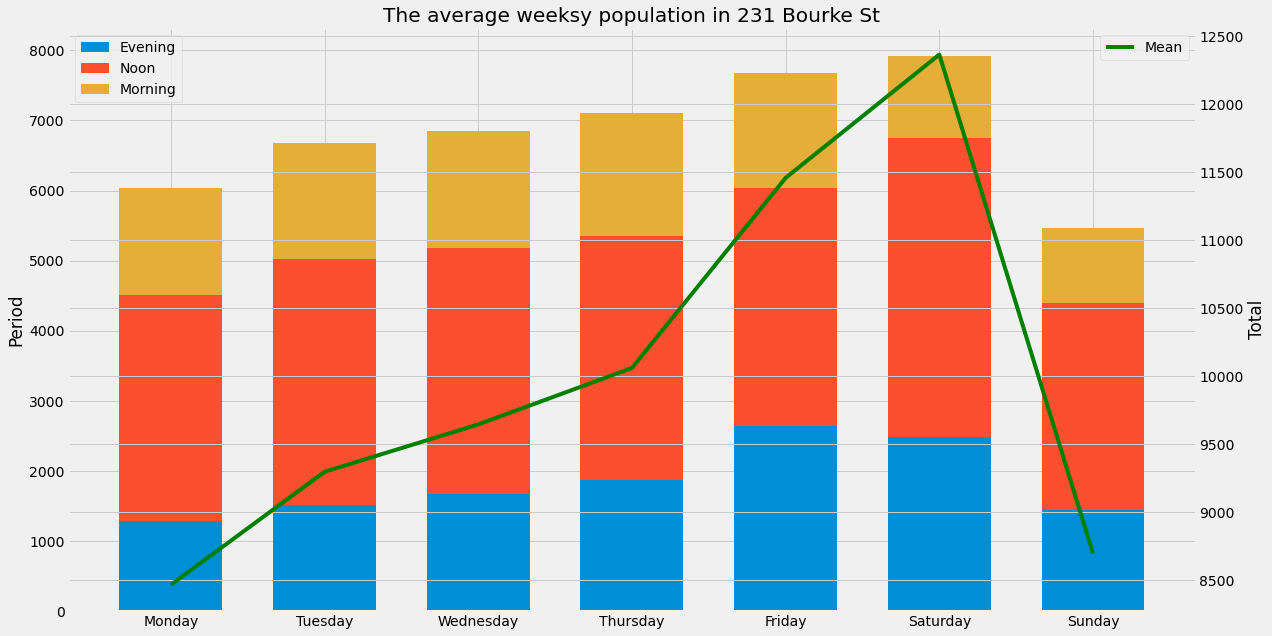

In [17]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,10))
x = weeks
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)
  
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)
ax=plt.gca()
ax2 = ax.twinx()
ax2.plot(x,[x for x in means],c='g',label='Mean')#devide by 3,the mean of each day per session
plt.xlabel("Month",size=20)
ax.set_ylabel("Period")
ax2.set_ylabel("Total")
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("The average weeksy population in "+point)
plt.savefig('img_wk.png')
plt.show()

In [18]:

# monthly pedistrain comparison at 231 bourke st # most visited site 
data_mt = pd.read_csv('foottrafficsdata2021.csv')
data_mt = data_mt[['id','date_time','year','month','mdate','day','time','sensor_id','sensor_name','hourly_counts']]
#selected area
point='231 Bourke St'
data_mt=data_mt[data_mt['sensor_name']==point]
months=['January','February','March','April','May','June','July','August','September','October','November','December']

In [19]:
mors=[]
noons=[]
eves=[]
means=[]
for month in months:
    month_data=data_mt.groupby('month').get_group(month)
    mors.append(month_data[month_data['time'].between(7, 10)].hourly_counts.sum()/30)
    noons.append(month_data[month_data['time'].between(12, 15)].hourly_counts.sum()/30)
    eves.append(month_data[month_data['time'].between(18, 21)].hourly_counts.sum()/30)
    means.append(month_data.hourly_counts.sum()/30)

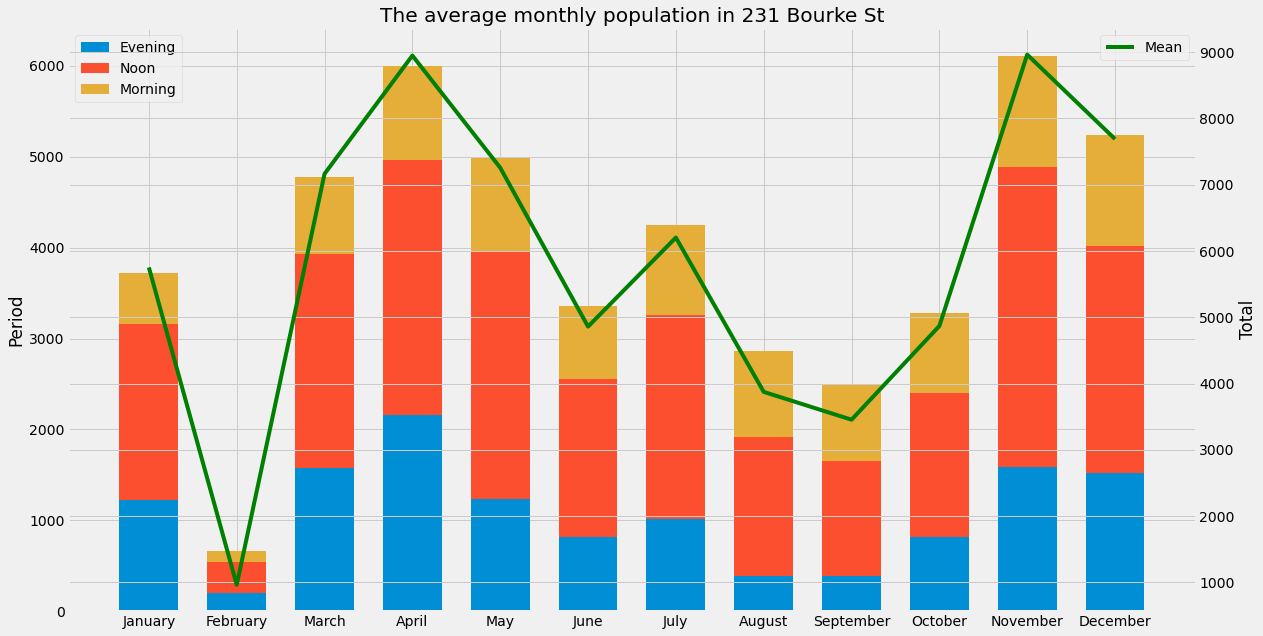

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,10))
x = months
y1 = np.array(eves)
y2 = np.array(noons)
y3 = np.array(mors)
  
plt.bar(x, y1, bottom=0,label='Evening', width=0.67)
plt.bar(x, y2, bottom=y1, label='Noon', width=0.67)
plt.bar(x, y3, bottom=y1+y2, label='Morning', width=0.67)
ax=plt.gca()
ax2 = ax.twinx()
ax2.plot(x,[x for x in means],c='g',label='Mean') #/3 average in each month per session
plt.xlabel("Month",size=20)
ax.set_ylabel("Period")
ax2.set_ylabel("Total")
ax.legend()
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("The average monthly population in "+point)
plt.savefig('img_mth.png')
plt.show()

In [23]:
# Getting location coordinate

Location_list = results_2021_md_groupby_df["location"].tolist()

location = []
latitude = []
longitude = []

for i in Location_list:
    try:
        base_url = "https://maps.googleapis.com/maps/api/geocode/json"
        target_location2 = i + ", Melbourne"
    
        params = {"address": target_location2, "key": api_key}
        response = requests.get(base_url, params=params)
        location_geo = response.json()
        lat = location_geo["results"][0]["geometry"]["location"]["lat"]
        lng = location_geo["results"][0]["geometry"]["location"]["lng"]
        print(f"{target_location2}: {lat}, {lng}")
        location.append(i)
        latitude.append(lat)
        longitude.append(lng)
    except:
        print("Target location not found")

231 Bourke St, Melbourne: -37.8133992, 144.9668301
Alfred Place, Melbourne: -37.8143404, 144.9701942
Birrarung Marr, Melbourne: -37.8187351, 144.9742624
Bourke St - Spencer St (North), Melbourne: -37.8170606, 144.9533436
Bourke St - Spencer St (South), Melbourne: -37.8171069, 144.9531785
Bourke St Bridge, Melbourne: -37.8159602, 144.9572025
Bourke St-Russell St (West), Melbourne: -37.8159602, 144.9572025
Bourke Street Mall (North), Melbourne: -37.8137685, 144.9644379
Bourke Street Mall (South), Melbourne: -37.8137685, 144.9644379
Chinatown-Lt Bourke St (South), Melbourne: -37.8132372, 144.9627782
Chinatown-Swanston St (North), Melbourne: -37.8058235, 144.9631138
Collins Place (North), Melbourne: -37.8144674, 144.9733256
Collins Place (South), Melbourne: -37.8144674, 144.9733256
Collins St (North), Melbourne: -37.8182937, 144.956676
Elizabeth St-La Trobe St (East), Melbourne: -37.8102887, 144.9614233
Elizabeth St-Lonsdale St (South), Melbourne: -37.8122041, 144.962311
Errol Street (East

In [19]:
# create new df for location coordinate

location_dict = {
    "location": location,
    "Lat": latitude,
    "Lon": longitude,
    }
location_data_dict = pd.DataFrame(location_dict)

location_data_dict.head()

,location,Lat,Lon
0,231 Bourke St,-37.813399,144.966830
1,Alfred Place,-37.814340,144.970194
2,Birrarung Marr,-37.818735,144.974262
3,Bourke St - Spencer St (North),-37.817061,144.953344
4,Bourke St - Spencer St (South),-37.817107,144.953179


In [20]:
# merging foot traffic data and coord data

data_summary_2021 = location_data_dict.merge(results_2021_md_groupby_df,how="left", on="location" )
data_summary_2021.to_csv("datasummary21.csv")
data_summary_2021.head(10)

,location,Lat,Lon,Midday foottrafic 2021
0,231 Bourke St,-37.813399,144.966830,729886.0
1,Alfred Place,-37.814340,144.970194,185084.0
2,Birrarung Marr,-37.818735,144.974262,320080.0
3,Bourke St - Spencer St (North),-37.817061,144.953344,641481.0
4,Bourke St - Spencer St (South),-37.817107,144.953179,33935.0
5,Bourke St Bridge,-37.815960,144.957202,481068.0
6,Bourke St-Russell St (West),-37.815960,144.957202,703647.0
7,Bourke Street Mall (North),-37.813769,144.964438,2065840.0
8,Bourke Street Mall (South),-37.813769,144.964438,1343311.0
9,Chinatown-Lt Bourke St (South),-37.813237,144.962778,352403.0


In [22]:
# creating google heatmap

# location & foot traffic input
lat_long = data_summary_2021[["Lat", "Lon"]]
foottrafic = data_summary_2021["Midday foottrafic 2021"]

# Plot Heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(lat_long, weights=foottrafic, max_intensity=2000000)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))